<a href="https://colab.research.google.com/github/johnvalen1/Balanced-Plus-ML-Club/blob/main/Simple_Neural_Network_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constructing and illustrating a simple neural network

See: https://towardsdatascience.com/perceptrons-the-first-neural-network-model-8b3ee4513757

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In the following code block, we implement a Perceptron (another term for single-layer neural network) of the form Y = W'X + b.
Notice that there is only layer because there is only one matrix of weights W, and one scalar bias, b.

In [2]:
from sklearn.base import BaseEstimator

class Perceptron(BaseEstimator):
    def __init__(self, alpha, n_epochs):
        self.alpha = alpha
        self.n_epochs = n_epochs
        
    def fit(self, X, y):
        # X is the input, y is the desire output, or 'ground truth'
        (n, m) = X.shape
        
        # Initialize the weights according to random draws
        self.w = np.random.randn(m)
        self.b = 0
        
        # The training loop
        for epoch in range(self.n_epochs):
            n_errors = 0
            
            for i in range(n):
                prediction_i = self.predict(X[i])
                if prediction_i != y[i]:
                    # i.e. if the prediction is NOT equal to the truth (the model predicts the wrong thing)
                    self.w += self.alpha * (y[i] - prediction_i) * X[i]
                    self.b += self.alpha * (y[i] - prediction_i)
                    n_errors += 1
            
            accuracy = 1 - (n_errors / n)
            print(f'Epoch {epoch + 1}: accuracy = {accuracy:.3f}')
            
            if n_errors == 0:
                break
                
    def predict(self, X):
        z = X @ self.w + self.b # @ denotes matrix multiplication
        return np.heaviside(z, 1) # Heaviside is the mathematical name for the step function, f(x) = 0 if x < 0 and 1 otherwise.

Create some data using the 'make_blobs' function, to randomly sample datapoints and train the model on.

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=0.5)

Text(0, 0.5, '$x_2$')

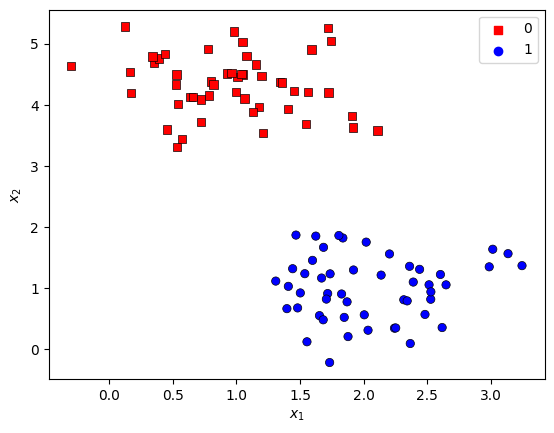

In [5]:
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


Fitting the model to the above data will guarantee convergence, and therefore accuracy of 1: why?
According to the Perceptron Convergence Theorem...any linearly separable space is learnable given enough training iterations and a reasonable initialization scheme.

In [6]:
perceptron = Perceptron(alpha=0.01, n_epochs=10)
perceptron.fit(X, y)

Epoch 1: accuracy = 0.250
Epoch 2: accuracy = 0.950
Epoch 3: accuracy = 1.000


The below is a helper function to plot the space and the learned 'hyperplane' (in this case, a simple line, but in higher dimensions we cannot call this a line), which is the separator that defines the decision rule according to the model. Going forward, any new points will be classified simply by comparing their position relative to this learned hyperplane.

In [7]:
def plot_decision_boundary(model, X, y):
    # Retrieve the model parameters
    bias = model.b
    w1, w2 = model.w[0], model.w[1]

    # Calculate the intercept and slope of the decision boundary
    b = -bias / w2
    m = -w1 / w2
    
    x1 = X[:, 0]
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() - 0.2, x1.max() + 0.2
    x2_min, x2_max = x2.min() - 0.5, x2.max() + 0.5
    x1_d = np.array([x1_min, x1_max])
    x2_d = m * x1_d + b

    plt.plot(x1_d, x2_d, 'k', ls='--')
    plt.fill_between(x1_d, x2_d, x2_min, color='blue', alpha=0.25)
    plt.fill_between(x1_d, x2_d, x2_max, color='red', alpha=0.25)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    
    sns.scatterplot(x=x1, y=x2, hue=y, style=y, markers=('s', 'o'), 
                    palette=('r', 'b'), edgecolor='black')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

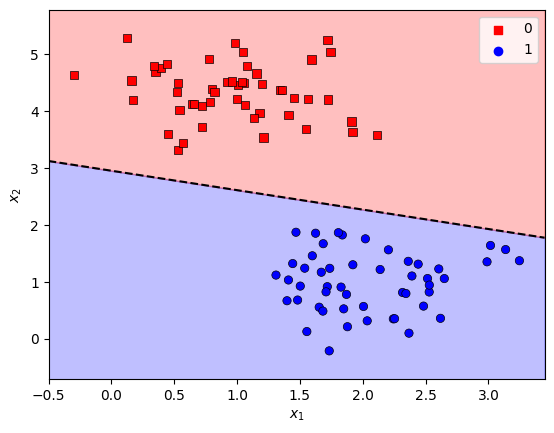

In [8]:
plot_decision_boundary(perceptron, X, y)

# Concluding thoughts...
Now think about what would happen if the dots were not so cleanly separated (and not in a linear fashion). A Perceptron would no longer suffice.